# DBTL 0.2 data analysis

This notebook analyzes OD340 and OD600 data from DBTL cycle 0.2 of flaviolin producing P. putida strain.

## Inputs and outputs

#### Required file to run this notebook:
   - edd slug


#### File generated by running this notebook:
   
 
    
The files are stored in the user defined directory.

## Setup

Importing needed libraries:

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

import edd_utils as eddu

### User parameters

In [19]:
CYCLE = 0.2

user_params = {
    'output_file_path': f'../data/flaviolin/DBTL{CYCLE}', # Folder for output files,
    'study_slug': 'combinatorial-media-for-flaviolin-dbtl02-c346',
    'edd_server': 'edd.jbei.org',
    'username': 'tradivojevic',
    } 

In [20]:
study_slug = user_params['study_slug']
edd_server = user_params['edd_server']
username = user_params['username']

## Load the study

In [21]:
try:
  session = eddu.login(edd_server=edd_server, user=username)
except:
  print('ERROR! Connection to EDD failed. We will try to load data from disk...')
else:
  print('OK! Connection to EDD successful. We will try to load data from EDD...')

Password for tradivojevic:  ··············


OK! Connection to EDD successful. We will try to load data from EDD...


In [22]:
df: pd.DataFrame
    
try:
    df = eddu.export_study(session, study_slug, edd_server=edd_server)
except (NameError, AttributeError, KeyError):
    try:
        df = pd.read_csv(user_params['study_file'])
    except:
        print(f'ERROR! Alternative loading of data from disk failed!')
    else:
        print(f'OK! Alternative loading of data from disk was successful.')


  0%|          | 0/96 [00:00<?, ?it/s]

In [23]:
df.head(2)

,Study ID,Study Name,Line ID,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,147494,Combinatorial media for flaviolin DBTL0.2,147495,C0.2_WA1-R1,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,147543,C0.2_WA1-R1,NaN,Optical Density,0,NaN,0.692,48.0
1,147494,Combinatorial media for flaviolin DBTL0.2,147496,C0.2_WB1-R2,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,147544,C0.2_WB1-R2,NaN,Optical Density,0,NaN,1.129,48.0


Drop unnecessary columns:

In [24]:
df = df.loc[:,['Line Name','Line Description','Protocol','Value']]
df.head()

,Line Name,Line Description,Protocol,Value
0,C0.2_WA1-R1,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,0.692
1,C0.2_WB1-R2,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,1.129
2,C0.2_WC1-R3,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,0.806
3,C0.2_WD1-R4,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,0.799
4,C0.2_WE1-R5,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,0.964


In [25]:
find_row = lambda x: x['Line Name'][6]
find_col = lambda x: x['Line Name'][7]

In [26]:
df['Row'] =  df.apply(find_row, axis=1)
df['Column'] = df.apply(find_col, axis=1)
df.head(2)

,Line Name,Line Description,Protocol,Value,Row,Column
0,C0.2_WA1-R1,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,0.692,A,1
1,C0.2_WB1-R2,"MOPS: 40.0000, Tricine: 4.0000, H3BO3: 0.0040,...",OD340,1.129,B,1


## Coefficient of variation

In [27]:
stats = df.groupby(['Protocol']).mean()
stats.rename(columns={'Value': 'mean'}, inplace=True)
stats['std'] = df.groupby(['Protocol']).std()
stats['CV[%]'] = 100*stats['std'] / stats['mean']
stats

,mean,std,CV[%]
Protocol,,,
OD340,0.801229,0.374187,46.701644
OD600,0.295625,0.175620,59.406326


### Coefficient of variation for sucesses only

In [28]:
df_success = df[df['Value'] > 0.1]
stats_success = df_success.groupby(['Protocol']).mean()
stats_success.rename(columns={'Value': 'mean'}, inplace=True)
stats_success['std'] = df_success.groupby(['Protocol']).std()
stats_success['CV[%]'] = 100*stats_success['std'] / stats_success['mean']
stats_success

,mean,std,CV[%]
Protocol,,,
OD340,0.890442,0.280028,31.448188
OD600,0.329907,0.151535,45.932637


## Visualization

### Swarmplot of OD measurements

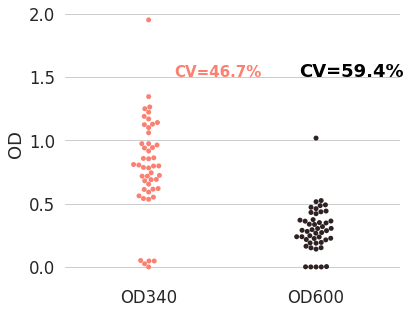

In [33]:
fig, ax = plt.subplots(figsize=(6, 5))
fontsize = 16
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
sns.swarmplot(data=df, 
              linewidth=0,
              x='Protocol',
              y='Value',
              palette="dark:salmon_r"
              )
plt.text(0.15, 1.5, 
         f"CV={stats.loc['OD340','CV[%]']:.3}%", 
         horizontalalignment='left', 
         size='small', 
         color='salmon', 
         weight='semibold')
plt.text(0.9, 1.5, 
         f"CV={stats.loc['OD600','CV[%]']:.3}%", 
         horizontalalignment='left', 
         color='black', 
         weight='semibold'
        )
sns.despine(left=True, bottom=True)
ax.set(xlabel=None, ylabel="OD")

fig.savefig(
    f"{user_params['output_file_path']}/swarm_both.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

### Plot OD measurements per well

In [34]:
data_od600 = df[df['Protocol']=='OD600'].pivot('Row', 'Column')['Value']
data_od340 = df[df['Protocol']=='OD340'].pivot('Row', 'Column')['Value']

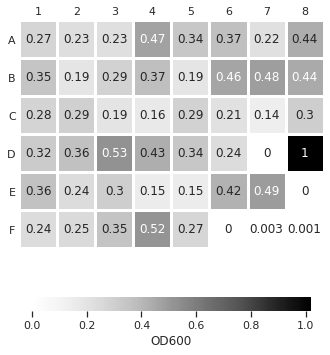

In [36]:
fig = plt.figure(figsize=(10,6))
sns.set(font_scale = 1)
ax = sns.heatmap(data=data_od600, 
                 linewidths=3, 
                 linecolor="w",
                 square= True,
                 cmap="Greys", #Greys, YlGn
                 cbar_kws={"orientation": "horizontal",
                           "shrink": 0.5,
                           'label': 'OD600'
                          },
                 annot = True,
                )
ax.set(xlabel=None, ylabel=None)
plt.yticks(rotation = 0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.xaxis.tick_top()
fig.savefig(
    f"{user_params['output_file_path']}/OD600.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)

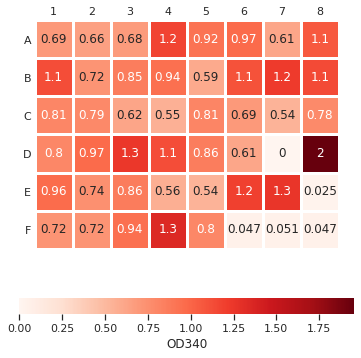

In [37]:
fig = plt.figure(figsize=(10,6))
colormap = sns.color_palette("light:salmon", as_cmap=True)
colormap = "Reds"
sns.set_context("notebook", font_scale=1., rc={"lines.linewidth": 2.5})
ax = sns.heatmap(data_od340, 
                 linewidths=3, 
                 linecolor="w",
                 square= True,
                 cmap=colormap,
                 cbar_kws={"orientation": "horizontal",
                           "shrink": 0.6,
                           'label': 'OD340'
                          },
                 annot = True,
                )
ax.set(xlabel=None, ylabel=None)
plt.yticks(rotation=0)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.xaxis.tick_top()
fig.savefig(
    f"{user_params['output_file_path']}/OD340.png",
    transparent=False,
    bbox_inches="tight",
    dpi=300,
)